In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import snowflake.connector 

In [2]:
import getpass

In [3]:
### connect python to snowflake 

db = snowflake.connector.connect ( user  = "Rahul140",
                        password = "Rahul@123456789",
                        account = "KTUTYPO-HM89822",
                        database = "ECOM_AWS",
                        schema = "PUBLIC",
                        warehouse = "COMPUTE_WH"
                       )

In [4]:
curr = db.cursor()

## Queries......

# Basic
# Ques 1 : List all unique cities where customer are located

In [5]:
query = """select distinct CUSTOMER_CITY from ECO_CONSUMER """
curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data)
data.head(10)

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,belo horizonte
8,montes claros
9,rio de janeiro


# Quest 2 : count the number of orders placed in 2017.

In [6]:
query = """select count(ORDER_ID) from ECO_ORDERS where year(ORDER_PURCHASE_TIMESTAMP) = 2017"""
curr.execute(query)
data = curr.fetchall()
data

[(45101,)]

In [7]:
"Total orders placed in 2017 are ",  data[0][0]

('Total orders placed in 2017 are ', 45101)

# 3 Find total sales per category

In [8]:
query = """ select upper(ECO_PRODUCTS.PRODUCT_CATEGORY) as category,round(sum(ECO_PAYMENTS.PAYMENT_VALUE),2) as sales 
            from ECO_PRODUCTS join ECO_ORDERITEM
            on ECO_PRODUCTS.PRODUCT_ID = ECO_ORDERITEM.PRODUCT_ID
            join ECO_PAYMENTS
            on ECO_ORDERITEM.ORDER_ID = ECO_PAYMENTS.ORDER_ID
            group by category """
curr.execute(query)
data = curr.fetchall()
data

[('PET SHOP', 311268.97),
 ('GARDEN TOOLS', 838280.75),
 ('HOUSEWARES', 1094758.13),
 ('SPORT LEISURE', 1392127.56),
 ('TOYS', 619037.69),
 ('WATCHES PRESENT', 1429216.68),
 ('STATIONARY STORE', 317440.07),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 74660.98),
 ('HYGIENE DIAPERS', 4221.25),
 ('CINE PHOTO', 9530.32),
 ("FASHION MEN'S CLOTHING", 17290.98),
 ('DRINK FOODS', 27289.73),
 ('ELECTRICES 2', 124563.46),
 ('PCS', 279121.55),
 ('CHRISTMAS ARTICLES', 18994.77),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('ELECTROSTILE', 225584.38),
 ('ART', 30992.93),
 ('MARKET PLACE', 45335.92),
 ('FLOWERS', 2213.01),
 ('CITTE AND UPHACK FURNITURE', 5998.54),
 ('KITCHEN PORTABLE AND FOOD COACH', 4335.65),
 ('FASHION SPORT', 3645.92),
 ('INSURANCE AND SERVICES', 324.51),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('FOODS', 46428.67),
 ('CONSTRUCTION TOOLS GARDEN', 42394.41),
 ('IMAGE IMPORT TABLETS', 10042.93),
 ('ARTS AND CRAFTS', 2326.17),
 ('ELECTRONICS', 259857.1),
 ('CAS

In [9]:
df = pd.DataFrame(data, columns  = ["Category","Total_sales"])
df

,Category,Total_sales
0,PET SHOP,311268.97
1,GARDEN TOOLS,838280.75
2,HOUSEWARES,1094758.13
3,SPORT LEISURE,1392127.56
4,TOYS,619037.69
...,...,...
69,BLU RAY DVDS,7935.28
70,CDS MUSIC DVDS,1199.43
71,LA CUISINE,2913.53
72,PC GAMER,2174.43


# 3. Calculate the percentage of orders that were paid in iinstallments

In [10]:
query = """select (sum(case when PAYMENT_INSTALLMENTS >= 1 then 1 else 0 end)/count(*))*100 from ECO_PAYMENTS"""
curr.execute(query)
data = curr.fetchall()
"percentage of orders that were paid in iinstallments is",data[0][0]

('percentage of orders that were paid in iinstallments is',
 Decimal('99.998100'))

# 4. Count the number of customers from each state.

In [11]:
query = """select CUSTOMER_STATE,count(CUSTOMER_UNIQUE_ID) as total_customer from ECO_CONSUMER
           group by CUSTOMER_STATE"""
curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data, columns  = ["state","customer_count"])
data

,state,customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,ES,2033
8,BA,3380
9,MA,747


In [12]:
data = data.sort_values(by = "customer_count",ascending= False)

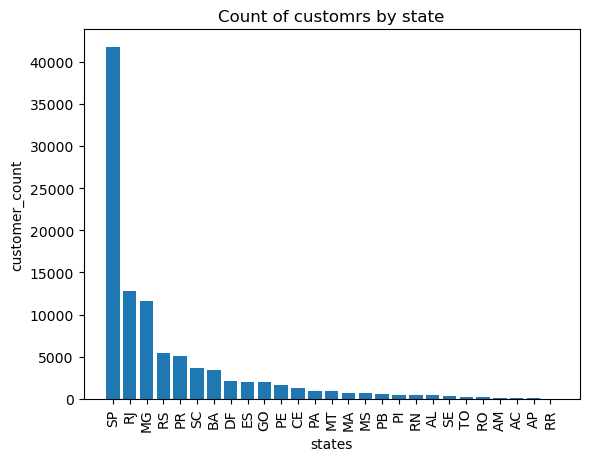

In [13]:
plt.bar(data["state"], data["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of customrs by state")
plt.show()

# Intermediate queries

# 1. calculate the no of orders per month in 2018

In [14]:
query = """select monthname(ORDER_PURCHASE_TIMESTAMP) AS Month_name,
           
           count(ORDER_ID) as total_orders,
           from ECO_ORDERS where year(ORDER_PURCHASE_TIMESTAMP) = 2018
           group by Month_name
           ; """
curr.execute(query)
data = curr.fetchall()
df = pd.DataFrame(data, columns = ["Month_name","total_orders"])
df

,Month_name,total_orders
0,Jul,6292
1,Aug,6512
2,Feb,6728
3,Jun,6167
4,Mar,7211
5,May,6873
6,Apr,6939
7,Jan,7269
8,Sep,16
9,Oct,4


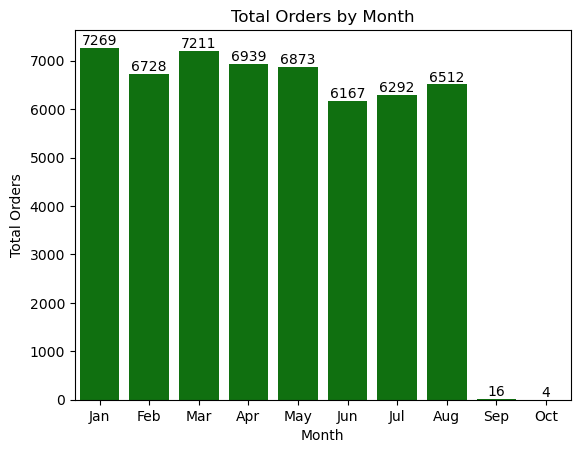

In [15]:
o = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
ax = sns.barplot(data=df, x="Month_name", y="total_orders", order=o, color = "g")
plt.title("Total Orders by Month")
plt.ylabel("Total Orders")
plt.xlabel("Month")
ax.bar_label(ax.containers[0])
plt.show()

# 2.Find the average number of products per order,grouped by customer city.

In [16]:
query = """WITH COUNT_PER_ORDER AS (SELECT ECO_ORDERS.ORDER_ID,
ECO_ORDERS.CUSTOMER_ID,
COUNT(ECO_ORDERITEM.ORDER_ID) AS OC
FROM ECO_ORDERS JOIN ECO_ORDERITEM
ON ECO_ORDERS.ORDER_ID = ECO_ORDERITEM.ORDER_ID
GROUP BY ECO_ORDERS.ORDER_ID,ECO_ORDERS.CUSTOMER_ID)

SELECT ECO_CONSUMER.CUSTOMER_CITY AS CUST_CITY,
ROUND(AVG(COUNT_PER_ORDER.OC),2)AS AVG_ORDER
FROM ECO_CONSUMER JOIN COUNT_PER_ORDER
ON ECO_CONSUMER.CUSTOMER_ID = COUNT_PER_ORDER.CUSTOMER_ID
GROUP BY CUST_CITY;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data, columns = ["Customer_city","avg_order"])
data.head(10)

,Customer_city,avg_order
0,sorocaba,1.11
1,treviso,1.00
2,nova iguacu,1.14
3,florianopolis,1.17
4,ribeiro junqueira,1.00
5,rio de janeiro,1.16
6,santos dumont,1.08
7,mage,1.11
8,porto velho,1.18
9,guarapuava,1.04


# 3. Calculate the percentage of total revenue contributed by each product category,

In [17]:
query = """ select upper(ECO_PRODUCTS.PRODUCT_CATEGORY) as category ,
round(((sum(ECO_PAYMENTS.PAYMENT_VALUE)/(select sum(payment_value) from ECO_PAYMENTS))*100),2) as sales
            from ECO_PRODUCTS join ECO_ORDERITEM
            on ECO_PRODUCTS.PRODUCT_ID = ECO_ORDERITEM.PRODUCT_ID
            join ECO_PAYMENTS
            on ECO_ORDERITEM.ORDER_ID = ECO_PAYMENTS.ORDER_ID
            group by category order by sales desc; """

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data , columns  = ["category","per_distribution"])
data.head()

,category,per_distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,WATCHES PRESENT,8.93
4,FURNITURE DECORATION,8.93


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [18]:
query = """select ECO_PRODUCTS.PRODUCT_CATEGORY,
round(avg(ECO_ORDERITEM.PRICE),2),
count(ECO_ORDERITEM.PRODUCT_ID) as total_orders
from ECO_PRODUCTS join ECO_ORDERITEM
on ECO_PRODUCTS.PRODUCT_ID = ECO_ORDERITEM.PRODUCT_ID
group by ECO_PRODUCTS.PRODUCT_CATEGORY;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data, columns  = ["category","avg_price","items_orders"])
data.head()

,category,avg_price,items_orders
0,Cool Stuff,167.36,3796
1,Furniture Decoration,87.56,8334
2,housewares,90.79,6964
3,telephony,71.21,4545
4,sport leisure,114.34,8641


In [19]:
## correlation b/w price and orders 
import numpy as np
import numpy as np

arr1 = data["avg_price"]
arr2 = data["items_orders"]
corr_value = np.corrcoef(arr1, arr2)[0, 1]
print("Correlation:", corr_value)

Correlation: -0.10631569597436465


that is very near to zero that menas no relation or impect b/w price and orderd

# 5. Calculate the total revenue generated by each sellerr, and rank them by revenue.

In [20]:
query = """SELECT * ,
DENSE_RANK() OVER(ORDER BY REVENUE DESC) as rn FROM (
select ECO_ORDERITEM.SELLER_ID,
SUM(ECO_PAYMENTS.PAYMENT_VALUE) AS REVENUE
FROM ECO_PAYMENTS JOIN ECO_ORDERITEM
ON ECO_PAYMENTS.ORDER_ID = ECO_ORDERITEM.ORDER_ID
GROUP BY ECO_ORDERITEM.SELLER_ID) AS rn ;"""

curr.execute(query)
data = curr.fetchall()
df = pd.DataFrame(data , columns  = ["seller_id","total_revenue","Rank_dens"])
df.head(10)



,seller_id,total_revenue,Rank_dens
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.32,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12,7
7,955fee9216a65b617aa5c0531780ce60,236322.30,8
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.23,9
9,7e93a43ef30c4f03f38b393420bc753a,185134.21,10


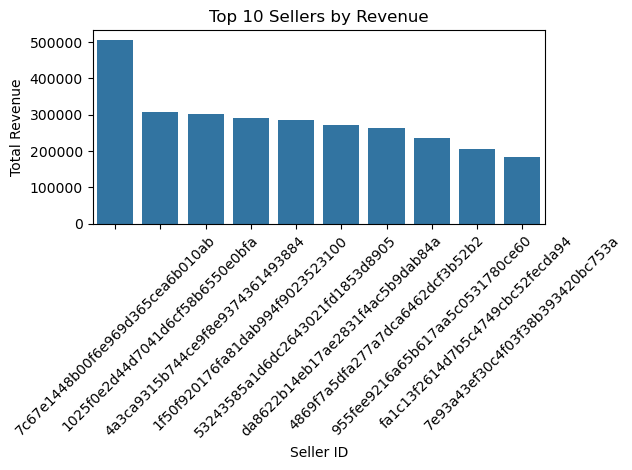

In [21]:
# Plot only top 10 sellers
top10 = df.head(10)

# Barplot
sns.barplot(data=top10, x="seller_id", y="total_revenue")
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for readability
plt.title("Top 10 Sellers by Revenue")
plt.xlabel("Seller ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [24]:
query = """SELECT CUSTOMER_ID,ORDER_PURCHASE_TIMESTAMP,PAYMENTS,
AVG (PAYMENTS) OVER(PARTITION BY CUSTOMER_ID ORDER BY ORDER_PURCHASE_TIMESTAMP 
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW ) AS MOV_AVG
FROM 
(select ECO_ORDERS.CUSTOMER_ID,
ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP,
ECO_PAYMENTS.PAYMENT_VALUE AS PAYMENTS 
from ECO_ORDERS join ECO_PAYMENTS
on ECO_ORDERS.ORDER_ID = ECO_PAYMENTS.ORDER_ID) AS A ;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data, columns = ["customer_id","purchase_date_time","payments","mov_avg"])
data

,customer_id,purchase_date_time,payments,mov_avg
0,"""6c769db0ae5e4b009eea220b38948f7e""",2017-09-11 18:09:30,37.60,37.60
1,"""685bbd16ecc319dc3f5945cd9410fd5a""",2017-12-09 17:41:53,98.72,98.72
2,"""2c8caa2f52a7abfe77e93f198a3af0e4""",2018-02-07 13:45:06,81.51,81.51
3,"""8af9ffddbad0cbb359c2c71f48994371""",2018-03-12 12:07:20,60.09,60.09
4,"""9e9880f137c3420ef35b5e1a43622e0b""",2017-11-21 13:31:31,153.90,153.90
...,...,...,...,...
39207,cb975b6c947fd99585d739e36394c740,2018-01-18 11:27:38,367.22,367.22
39208,"""25c6702d4b98e41d6bc8ebfa53bafab5""",2018-02-09 00:50:48,41.10,41.10
39209,ba43287dfe6db92bb0d2619bdffa26ef,2018-02-02 08:23:42,21.43,21.43
39210,"""989673e978a9791ee928fbf975f950e7""",2018-02-21 15:47:42,97.72,97.72


# 2. Calculate the cumulative sales per month foreach year.

In [26]:
query = """select years, months, payments,
sum(payments) over (order by years, months) as cumulative_payments
from 
(select year(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP) as years,
month(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP) as months,
round(sum(ECO_PAYMENTS.PAYMENT_VALUE),2) as payments 
from ECO_ORDERS join ECO_PAYMENTS
on ECO_ORDERS.ORDER_ID = ECO_PAYMENTS.ORDER_ID
group by years, months
order by years,months) as a;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data)
data.head()

,0,1,2,3
0,2016,9,75.06,75.06
1,2016,10,23493.18,23568.24
2,2016,12,19.62,23587.86
3,2017,1,56421.70,80009.56
4,2017,2,118765.42,198774.98


# 3. Calculate the year-over-year growth rate of total sales

In [27]:
query = """with a as (select year(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP) as years,
round(sum(ECO_PAYMENTS.PAYMENT_VALUE),2) as payments 
from ECO_ORDERS join ECO_PAYMENTS
on ECO_ORDERS.ORDER_ID = ECO_PAYMENTS.ORDER_ID
group by years
order by years)

select years,
payments,
lag(payments,1) over (order by years) as previous_years,
((payments-lag(payments,1) over (order by years))/lag(payments,1) over (order by years))*100 as YOY_CHANGES
from a;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data, columns =  ["year","years_sales","sale_change","YOY_changes"])
data



,year,years_sales,sale_change,YOY_changes
0,2016,23587.86,NaN,NaN
1,2017,2768782.48,23587.86,11638.167345
2,2018,3263477.58,2768782.48,17.866882


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [31]:
query = """WITH a AS (
  SELECT 
    ECO_ORDERS.CUSTOMER_ID,
    MIN(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP) AS first_purchased
  FROM ECO_ORDERS
  GROUP BY ECO_ORDERS.CUSTOMER_ID
),

b AS (
  SELECT 
    a.CUSTOMER_ID
  FROM a
  JOIN ECO_ORDERS
    ON a.CUSTOMER_ID = ECO_ORDERS.CUSTOMER_ID
    AND ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP > a.first_purchased
    AND ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP < DATEADD(MONTH, 6, a.first_purchased)
  GROUP BY a.CUSTOMER_ID
)

SELECT 
  100.0 * COUNT(DISTINCT b.CUSTOMER_ID) / COUNT(DISTINCT a.CUSTOMER_ID) AS retention_rate_percentage
FROM a
LEFT JOIN b ON a.CUSTOMER_ID = b.CUSTOMER_ID;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data)
data


,0
0,0.000000


Since none of the customers repeated their purchase, the retention value is zero

# 5. Identify the top 3 customers who spent the most money in each year.

In [36]:
query  = """with b as (WITH a AS (
  SELECT 
    ECO_ORDERS.CUSTOMER_ID AS customer_i,
    YEAR(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP) AS purchase_year,
    SUM(ECO_PAYMENTS.PAYMENT_VALUE) AS total_payments
  FROM ECO_ORDERS 
  JOIN ECO_PAYMENTS
    ON ECO_ORDERS.ORDER_ID = ECO_PAYMENTS.ORDER_ID
  GROUP BY ECO_ORDERS.CUSTOMER_ID, YEAR(ECO_ORDERS.ORDER_PURCHASE_TIMESTAMP)
)

SELECT 
  *, 
  dense_rank() OVER (partition by purchase_year ORDER BY total_payments DESC) AS d_rank
FROM a)

select *
from b
where d_rank <= 3
order by purchase_year;"""

curr.execute(query)
data = curr.fetchall()
data = pd.DataFrame(data ,columns = (["custumer_id","purchased_year","total_payments","d_rank"]))
data


,custumer_id,purchased_year,total_payments,d_rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.55,1
1,"""1d34ed25963d5aae4cf3d7f3a4cda173""",2016,1400.74,2
2,"""4a06381959b6670756de02e07b83815f""",2016,1227.78,3
3,"""58acc4e2788bf6fc445fddcce9c1db03""",2017,3782.19,3
4,"""3fd6777bbce08a352fddd04e4a7cc8f6""",2017,6726.66,1
5,df55c14d1476a9a3467f131269c2477f,2017,4950.34,2
6,f48d464a0baaea338cb25f816991ab1f,2018,6922.21,1
7,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.44,2
8,cc803a2c412833101651d3f90ca7de24,2018,4445.50,3


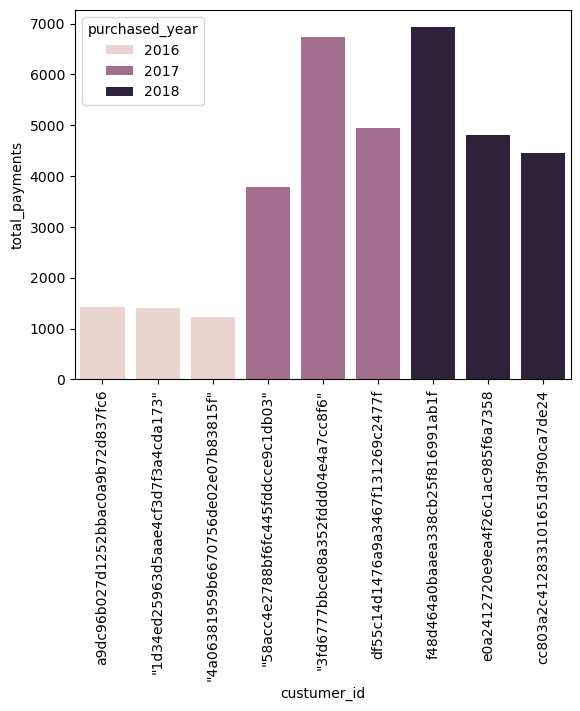

In [39]:
sns.barplot(x = "custumer_id", y = "total_payments", data = data, hue = "purchased_year")
plt.xticks(rotation = 90)
plt.show()